In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from dotenv import load_dotenv
import os
import chart_studio
load_dotenv();

# Data Dictionary

website: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [2]:
PATH = "./data/Bike-Sharing-Dataset/day.csv"
df = pd.read_csv(
    PATH,
    parse_dates=True
)

plotkey = os.getenv("PLOTLY")

drop_col = ["instant"]
df.drop(drop_col, axis=1, inplace=True)

df.corr().style.background_gradient(cmap="coolwarm").set_precision(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.00,-0.00,0.83,-0.01,-0.00,0.01,0.02,0.33,0.34,0.21,-0.23,0.21,0.41,0.41
yr,-0.00,1.00,-0.00,0.01,-0.01,-0.00,-0.05,0.05,0.05,-0.11,-0.01,0.25,0.59,0.57
mnth,0.83,-0.00,1.00,0.02,0.01,-0.01,0.04,0.22,0.23,0.22,-0.21,0.12,0.29,0.28
holiday,-0.01,0.01,0.02,1.00,-0.10,-0.25,-0.03,-0.03,-0.03,-0.02,0.01,0.05,-0.11,-0.07
weekday,-0.00,-0.01,0.01,-0.10,1.00,0.04,0.03,-0.00,-0.01,-0.05,0.01,0.06,0.06,0.07
workingday,0.01,-0.00,-0.01,-0.25,0.04,1.00,0.06,0.05,0.05,0.02,-0.02,-0.52,0.30,0.06
weathersit,0.02,-0.05,0.04,-0.03,0.03,0.06,1.00,-0.12,-0.12,0.59,0.04,-0.25,-0.26,-0.30
temp,0.33,0.05,0.22,-0.03,-0.00,0.05,-0.12,1.00,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.34,0.05,0.23,-0.03,-0.01,0.05,-0.12,0.99,1.00,0.14,-0.18,0.54,0.54,0.63
hum,0.21,-0.11,0.22,-0.02,-0.05,0.02,0.59,0.13,0.14,1.00,-0.25,-0.08,-0.09,-0.10


# Linear Regression (OLS)

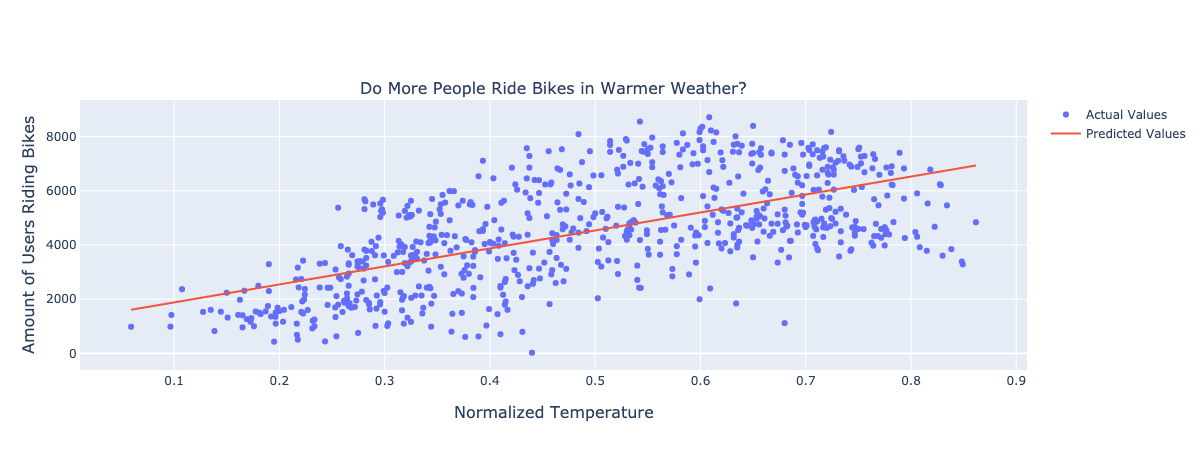

In [32]:
#Implement from scratch

class lr:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_mean = X.mean()
        self.y_mean = y.mean()
        
    
    def m(self):
        x_minus_mean = self.X - self.X_mean
        y_minus_mean = self.y - self.y_mean
        
        return sum(x_minus_mean * y_minus_mean)/sum((x_minus_mean)**2)
    
    def b(self):
        return self.y_mean - self.m()*self.X_mean
    
    def predict(self):
        return self.m()*self.X + self.b()

scratch_lr = lr(df["temp"], df["cnt"])

fig = make_subplots(
    rows=1, 
    cols=1, 
    column_titles=["Do More People Ride Bikes in Warmer Weather?"], 
    x_title = "Normalized Temperature",
    y_title = "Amount of Users Riding Bikes"
)

fig.add_trace(go.Scatter(x=df["temp"], y=df["cnt"], mode="markers", name="Actual Values"), row=1, col=1)
fig.add_trace(go.Scatter(x=df["temp"], y=scratch_lr.predict(), name="Predicted Values"), row=1, col=1)
fig.show()

In [4]:
# Save to chart studio
chart_studio.tools.set_credentials_file(username="mharman", api_key=plotkey)
chart_studio.plotly.plot(fig, filename="lr_chart", auto_open=True)

'https://plotly.com/~mharman/3/'

In [34]:
#Compare
X = df[["temp"]]
y = df[["cnt"]]

lr = LinearRegression()
lr.fit(X,y)

print(f"Scikit-Learn Linear Regression: {r2_score(y, lr.predict(X))}")
print(f"Linear Regression from Scratch: {r2_score(y, scratch_lr.predict())}")

Scikit-Learn Linear Regression: 0.3937487313729241
Linear Regression from Scratch: 0.3937487313729242


# Logistic Regression


In [6]:
from math import e

In [36]:
class lgr:
    def __init(self):
        pass
    
    def sigmoid(self):
        pass
    
    def train(self):
        pass
    
    def predict(self):
        pass
    
test = lgr()    